In [2]:
import pandas 
df = pandas.read_csv("input.txt", header=None, names=["depths"])

Part 1 : get diff between consecutive elements, keep the one greater than 0 and sums the boolean to count the occurences

In [3]:
sum(df.depths.diff()>0)

1529

Part 2 : same as part 1, just add a rolling window of 3 to perform the sum

In [4]:
sum(df.rolling(window=3).sum().depths.diff()>0)

1567

## extra 

Ok so we've noticed with my friends that we have different input files. One per user, or a finite number (like 20) i don't know, but i'm curious about the code used to generate the data. Let's try and see if we can reverse it.

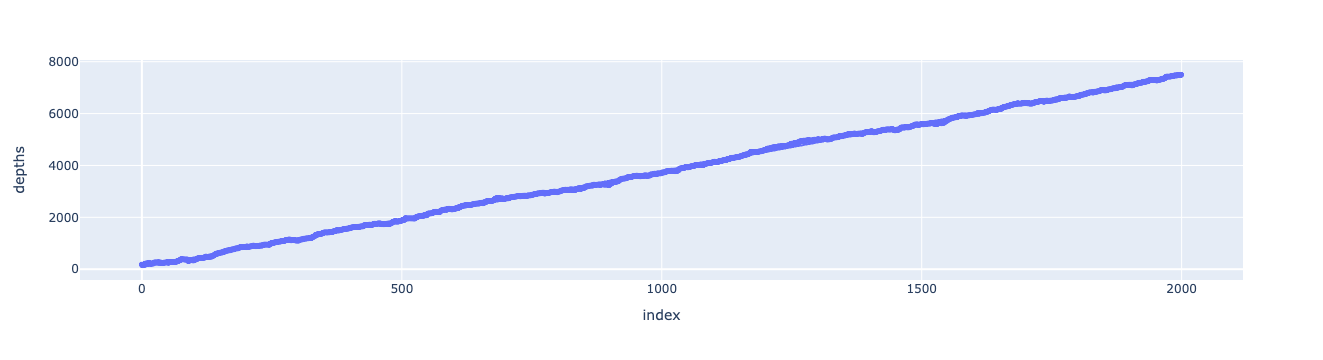

In [9]:
import plotly.express as px

fig = px.scatter(df, y="depths", trendline="ols")
fig.show()

Ok so it really looks like a line, and simple linear regression gets a 0,99 R2 which is prettt high

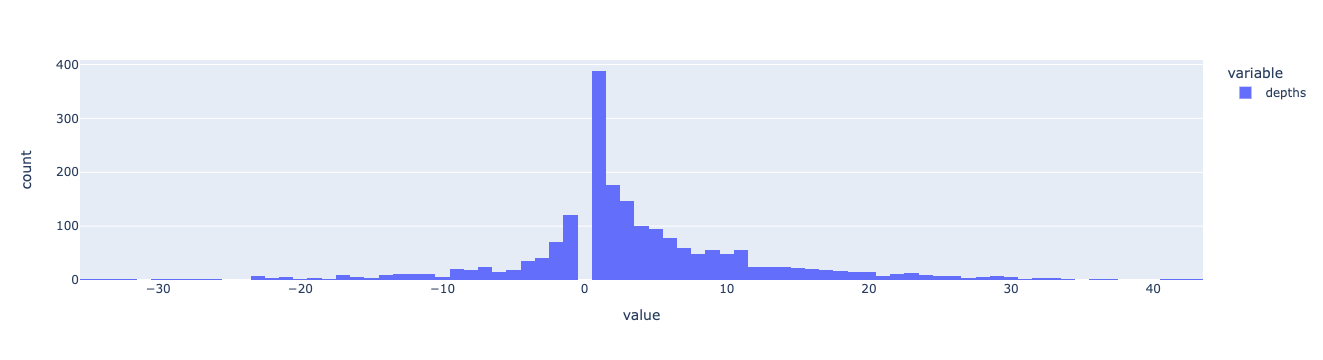

In [12]:
fig = px.histogram(df.depths.diff())
fig.show()

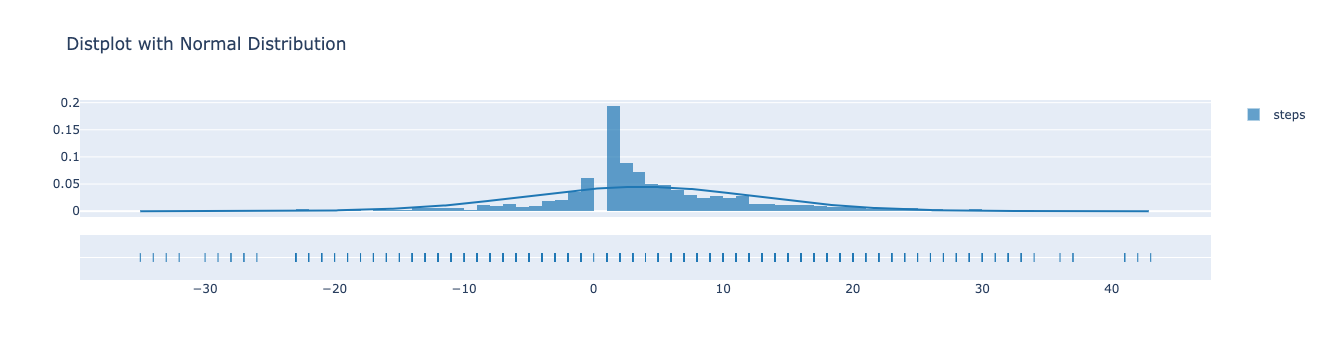

In [78]:
import plotly.figure_factory as ff

group_labels = ['steps']

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot([df.depths.diff().fillna(0)],group_labels,
                         curve_type='normal',) # override default 'kde')

# Add title
fig.update_layout(title_text='Distplot with Normal Distribution')
fig.show()

**idea 1** : sample from a linear model

In [18]:
from scipy.stats import norm
norm.fit(df.depths.diff()[1:])

(3.660330165082541, 8.910268151425672)

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [52]:
nsample = 2000
x = np.linspace(1, 2000, 2000)
e = np.random.normal(size=nsample) + 180

In [72]:
y = np.dot(np.vstack(x), [3.69]) + 5*e

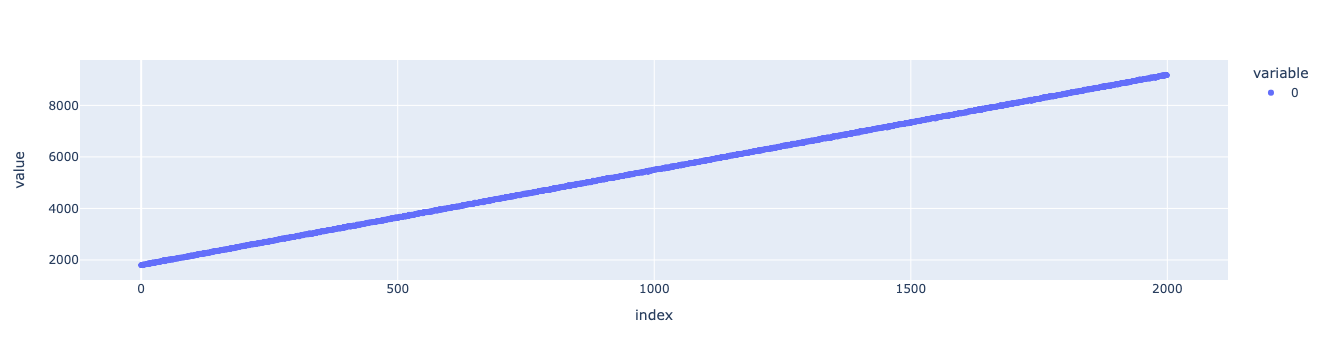

In [70]:
fig = px.scatter(y, trendline="ols")
fig.show()

In [73]:
df_y = pd.DataFrame(y, columns=["depths"])
print(sum(df_y.depths.diff()>0))

1389


It results in the same kind of result depeding on the noise we had on the sampling, but it's doesnt look like the data we got in input.

**idea 2** : consider the step as a random variable sampled from a normal distribution, and sample from the distribution and walk. Random walk ?